<a href="https://colab.research.google.com/github/Priyahasiniiii/AI-Chatbot/blob/main/Credit_card_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install zipfile36


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving fraudTest.csv.zip to fraudTest.csv (1).zip


In [ ]:
import pandas as pd

# Assuming the extracted file is 'fraudTest.csv'
df = pd.read_csv('/content/fraudTest.csv (1).zip')

# Display the first few rows of the dataset
df.head()


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
# Check for missing values
print("Missing values:", df.isnull().sum())

# Drop or fill missing values if necessary
df = df.dropna()  # You can also use df.fillna() if you prefer

# Print the available columns in the dataframe
print(df.columns)

# Split the data into features (X) and target (y)
# Replace 'Class' with the actual name of your target column from the output above
X = df.drop('is_fraud', axis=1)  # Replace 'actual_target_column_name' with the correct column name
y = df['is_fraud']  # Replace 'actual_target_column_name' with the correct column name


# ---Changes start here---
# Select only numeric features for scaling
numeric_features = X.select_dtypes(include=['number']).columns
X_numeric = X[numeric_features]

# Normalize/scale the numeric data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)
# ---Changes end here---

Missing values: Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64
Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check the size of the split
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Training set size: (444575, 10)
Test set size: (111144, 10)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9979126178651119

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    110718
           1       0.88      0.52      0.66       426

    accuracy                           1.00    111144
   macro avg       0.94      0.76      0.83    111144
weighted avg       1.00      1.00      1.00    111144


Confusion Matrix:
 [[110689     29]
 [   203    223]]


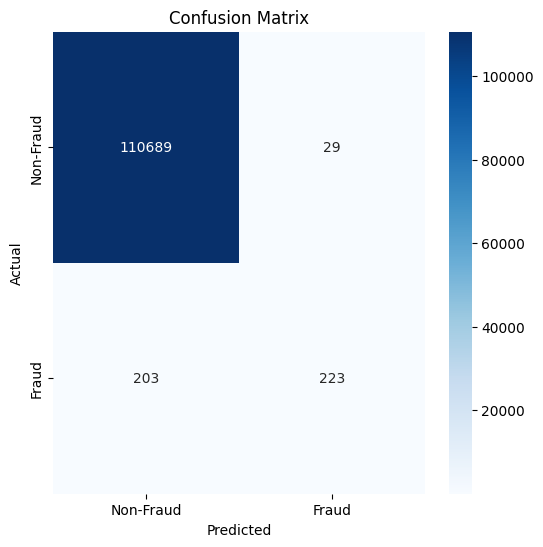

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train the model with balanced data
rf_model_smote = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_smote.fit(X_train_smote, y_train_smote)

# Evaluate on the test set
y_pred_smote = rf_model_smote.predict(X_test)

# Accuracy and classification report
print("Accuracy (SMOTE):", accuracy_score(y_test, y_pred_smote))
print("\nClassification Report (SMOTE):\n", classification_report(y_test, y_pred_smote))


Accuracy (SMOTE): 0.9971838335852587

Classification Report (SMOTE):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    110718
           1       0.61      0.71      0.66       426

    accuracy                           1.00    111144
   macro avg       0.81      0.86      0.83    111144
weighted avg       1.00      1.00      1.00    111144

